# MFN vs TFN on ranking-based comparison with only 'useful' alter and at least 2 meetups

In [1]:
import numpy as np
import pandas as pd
import meetup_strategy as ms
import time 
import pickle
import util
import seaborn as sns
%load_ext autoreload
%autoreload 2

In [2]:
import visualization as vs
from functools import reduce
import matplotlib.pyplot as plt
import pickle

# Global variables following ranking by CP

In [456]:
# placeid_path = "temp_data/wp-150/weeplace_placeidT_150.pickle"
# MFN_H_path = "final/wp-150/wp-H-MFN.csv"
# MFN_D_path = "final/wp-150/wp-D-MFN.csv"
# MFN_24H_path = "final/wp-150/wp-24H-MFN.csv"
# MFN_whole_path = "final/wp-150/wps10only-whole-MFN.csv"
# MFN_TFN_path = "final/wp-150/wp-TFN.csv"

In [4]:
placeid_path = "temp_data/wp-150/weeplace_placeidT_150.pickle"
MFN_H_path = "final/wp-150/wp-H-2-10-CP-MFN.csv"
MFN_D_path = "final/wp-150/wp-D-2-10-CP-MFN.csv"
MFN_24H_path = "final/wp-150/wp-24H-2-10-CP-MFN.csv"
MFN_whole_path = "final/wp-150/wps10only-whole-MFN.csv"
MFN_TFN_path = "final/wp-150/wp-TFN.csv"

In [3]:
def transform_df(MFN_H_path):
    df_H_MFN = pd.read_csv(MFN_H_path)
    df_H_MFN = df_H_MFN[['Included Rank','userid_y', 'CCE_alters', 'CCE_ego_alters', 'Pi_alters', 'Pi_ego_alters', 
                                     'LZ_entropy', 'Pi', 'n_meetupers_x', 'n_meetupers_y', 'userid_x']]
    df_H_MFN = df_H_MFN.rename({'Included Rank': 'Included', 
                                'userid_x': 'userid',
                                'Pi': 'Pi_ego'}, axis=1)

    df_H_MFN['Pi_alters_ratio'] = df_H_MFN['Pi_alters'] / df_H_MFN['Pi_ego'] 
    df_H_MFN['Pi_ego_alters_ratio'] = df_H_MFN['Pi_ego_alters'] / df_H_MFN['Pi_ego'] 
    return df_H_MFN

## H-MFN details

In [552]:
df_H_MFN = transform_df(MFN_H_path)

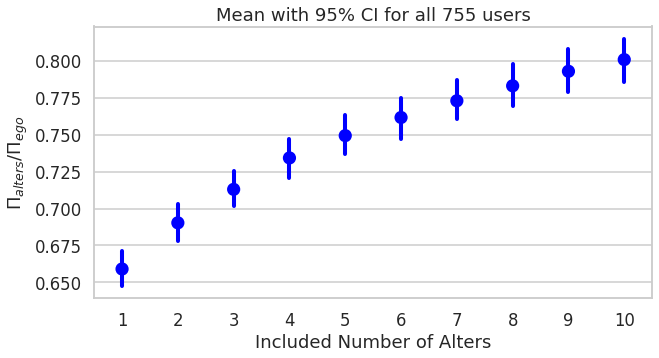

In [553]:
vs.cv_plot(df_H_MFN[df_H_MFN['n_meetupers_x'] >=10], threshold=10, 
           plot_type='errorbar', mode='talk', l=10, w=5)

## 24H-MFN details

In [556]:
df_24H_MFN = transform_df(MFN_24H_path)

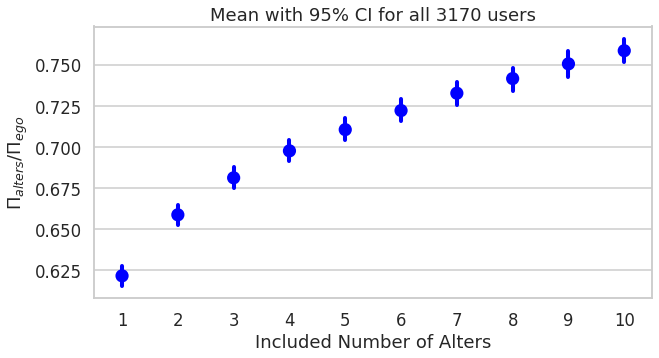

In [557]:
vs.cv_plot(df_24H_MFN[df_24H_MFN['n_meetupers_x'] >=10], threshold=10, 
           plot_type='errorbar', mode='talk', l=10, w=5)

## D-MFN details

In [558]:
df_D_MFN = transform_df(MFN_D_path)

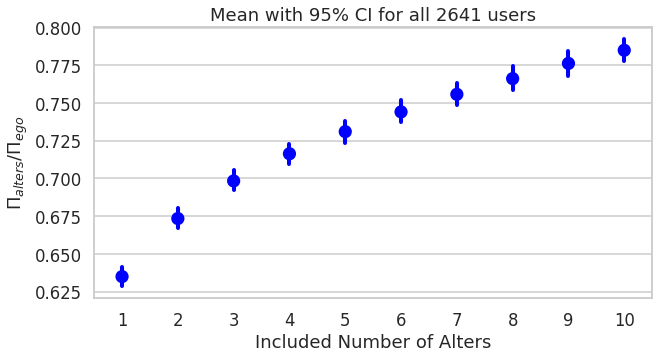

In [559]:
vs.cv_plot(df_D_MFN[df_D_MFN['n_meetupers_x'] >=10], threshold=10, 
           plot_type='errorbar', mode='talk', l=10, w=5)

## TFN details

In [36]:
df_TFN = transform_df(MFN_TFN_path)

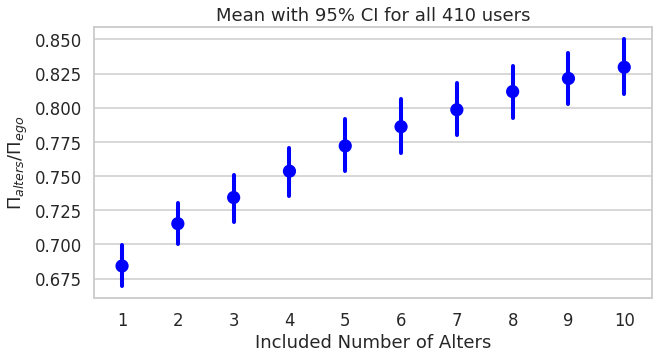

In [561]:
vs.cv_plot(df_TFN[df_TFN['n_meetupers_x'] >=10], threshold=10, 
           plot_type='errorbar', mode='talk', l=10, w=5)

## Compare MFNs and TFN, different egos in these networks

In [562]:
df_H_MFN['category'] = 'CB-1H-MFN'
df_D_MFN['category'] = 'CB-1D-MFN'
df_24H_MFN['category'] = 'SW-24H-MFN'
df_TFN['category'] = 'TFN'

In [563]:
all_networks = pd.concat([df_H_MFN, df_24H_MFN, df_D_MFN, df_TFN])

In [571]:
all_networks10 = all_networks[all_networks['n_meetupers_x'] >=10]
all_networks10.to_csv('final/wp-150/wp_all_network_2_10_CP.csv', index=False)

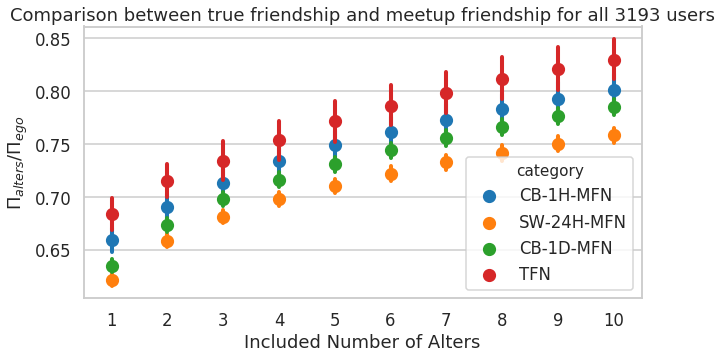

In [572]:
vs.cv_compare_plot(all_networks10, threshold=10, 
                   mode='talk', l=10, w=5)

## Compare MFNs and TFN, shared egos in both networks

In [479]:
df_all_MFN = transform_df(MFN_whole_path)
df_all_MFN['category'] = 'WT-MFN'

In [565]:
share_users_total = list(set(df_24H_MFN['userid'].tolist()) & 
                   set(df_H_MFN['userid'].tolist()) & 
                   set(df_D_MFN['userid'].tolist()) &
                   set(df_TFN['userid'].tolist()))
len(share_users_total)

710

In [566]:
share_users = list(set(df_24H_MFN[df_24H_MFN['n_meetupers_x'] >=10]['userid'].tolist()) & 
                   set(df_H_MFN[df_H_MFN['n_meetupers_x']>=10]['userid'].tolist()) & 
                   set(df_D_MFN[df_D_MFN['n_meetupers_x']>=10]['userid'].tolist()) &
                   set(df_TFN[df_TFN['n_meetupers_x']>=10]['userid'].tolist()) 
                  )
len(share_users)

289

In [384]:
# with open('temp_data/wp-150/wp-150-whole/wp_top10_ego.txt', 'a+') as outfile:
#     for i in range(len(share_users)):
#         outfile.write(str(share_users[i]) + '\n')

In [569]:
share_network = pd.concat([df_H_MFN[df_H_MFN['userid'].isin(share_users)],
                           df_24H_MFN[df_24H_MFN['userid'].isin(share_users)], 
                           df_D_MFN[df_D_MFN['userid'].isin(share_users)],
                           df_TFN[df_TFN['userid'].isin(share_users)],
#                            df_all_MFN
                          ])

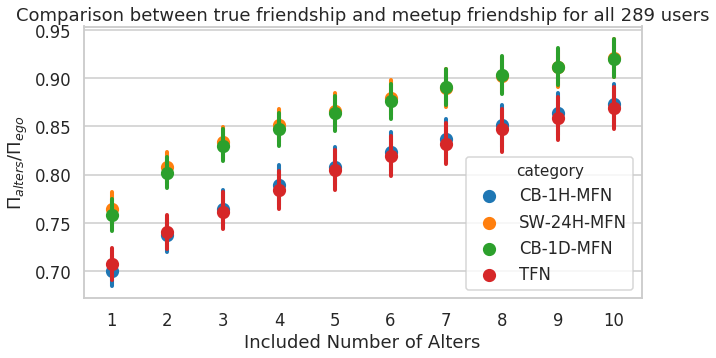

In [570]:
# vs.cv_compare_plot(share_network[share_network['n_meetupers_x'] >=10], threshold=10, mode='talk', l=10, w=5)
vs.cv_compare_plot(share_network, threshold=10, mode='talk', l=10, w=5)

In [573]:
# share_network.to_csv('final/wp-150/wp_shared_all.csv', index=False)
share_network.to_csv('final/wp-150/wp_shared_all_2_10_CP.csv', index=False)

# Check these friendship networks (Basic)

In [574]:
print(len(df_24H_MFN), len(df_D_MFN), len(df_H_MFN), len(df_TFN))

269488 202162 25429 21022


In [575]:
print(df_24H_MFN['userid'].nunique(), df_D_MFN['userid'].nunique(), df_H_MFN['userid'].nunique(), df_TFN['userid'].nunique())

3170 2641 755 5557


In [576]:
n_meetupers_24H = df_24H_MFN.groupby('userid')['userid_y'].count().reset_index(name = 'count')
n_meetupers_24H['category'] = '24H-MFN'

n_meetupers_D = df_D_MFN.groupby('userid')['userid_y'].count().reset_index(name = 'count')
n_meetupers_D['category'] = 'D-MFN'

n_meetupers_H = df_H_MFN.groupby('userid')['userid_y'].count().reset_index(name = 'count')
n_meetupers_H['category'] = 'H-MFN'

n_meetupers_TFN = df_TFN.groupby('userid')['userid_y'].count().reset_index(name = 'count')
n_meetupers_TFN['category'] = 'TFN'

In [577]:
n_meetupers_ego = pd.concat([n_meetupers_24H, n_meetupers_D, n_meetupers_H, n_meetupers_TFN
                            ]
                           )

Text(0.5, 1.0, 'The average number of alters for each ego (all users)')

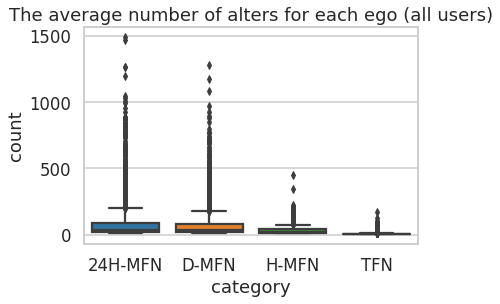

In [578]:
sns.boxplot(data=n_meetupers_ego, x='category', y = 'count').set_title("The average number of alters for each ego (all users)")

In [579]:
print(df_24H_MFN.groupby('userid')['userid_y'].count().sum()/df_24H_MFN['userid'].nunique(),
      df_D_MFN.groupby('userid')['userid_y'].count().sum()/df_D_MFN['userid'].nunique(),
      df_H_MFN.groupby('userid')['userid_y'].count().sum()/df_H_MFN['userid'].nunique(),
      df_TFN.groupby('userid')['userid_y'].count().sum()/df_TFN['userid'].nunique(),
)

85.01198738170346 76.54751987883378 33.680794701986756 3.7829764261292063


# Check these friendship networks on shared users (total)

In [580]:
len(share_users_total)

710

In [581]:
share_network_total = pd.concat([df_24H_MFN[df_24H_MFN['userid'].isin(share_users_total)], 
                           df_H_MFN[df_H_MFN['userid'].isin(share_users_total)],
                           df_D_MFN[df_D_MFN['userid'].isin(share_users_total)],
                           df_TFN[df_TFN['userid'].isin(share_users_total)]
                          ])

In [582]:
share_network_total.groupby('category').size()

category
CB-1D-MFN     136401
CB-1H-MFN      24509
SW-24H-MFN    168303
TFN             8224
dtype: int64

In [583]:
n_meetuper_total_shared_ego = share_network_total.groupby(['category', 'userid'])['Included'].count().reset_index(name='count')

Text(0.5, 1.0, 'The average number of alters for each ego (all shared users)')

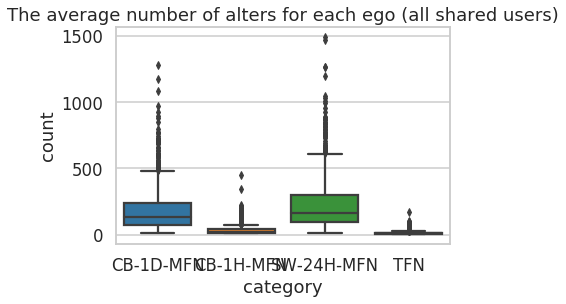

In [584]:
sns.boxplot(data=n_meetuper_total_shared_ego, x='category', 
            y = 'count').set_title("The average number of alters for each ego (all shared users)")

In [585]:
n_meetuper_total_shared_ego.groupby('category')['count'].sum()/len(share_users_total)

category
CB-1D-MFN     192.114085
CB-1H-MFN      34.519718
SW-24H-MFN    237.046479
TFN            11.583099
Name: count, dtype: float64

# Check these friendship networks on shared users (>=10 meetupers)

In [586]:
len(share_users)

289

In [587]:
share_network.groupby('category').size()

category
CB-1D-MFN     70498
CB-1H-MFN     13549
SW-24H-MFN    85480
TFN            6346
dtype: int64

In [588]:
n_meetuper_shared_ego = share_network[share_network['category'] != 'All-MFN'
                                     ].groupby(['category', 'userid'])['Included'].count().reset_index(name='count')

Text(0.5, 1.0, 'The average number of alters for each ego \n (Shared users with >= 10 meetupers)')

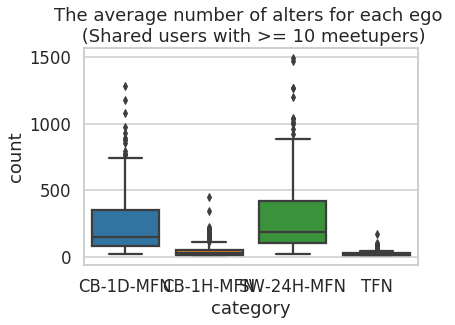

In [589]:
sns.boxplot(data=n_meetuper_shared_ego, x='category', 
            y = 'count').set_title("The average number of alters for each ego \n (Shared users with >= 10 meetupers)")

In [590]:
n_meetuper_shared_ego.groupby('category')['count'].sum()/len(share_users)

category
CB-1D-MFN     243.937716
CB-1H-MFN      46.882353
SW-24H-MFN    295.778547
TFN            21.958478
Name: count, dtype: float64

# Check these friendship network only on top-10 friends

In [591]:
VIP_network = share_network[share_network['Included'] <=10]

In [592]:
VIP_network.to_csv('final/wp-150/wp_VIP_CP.csv', index=False)

In [594]:
VIP_network_24H_MFN = VIP_network[VIP_network['category'] == 'SW-24H-MFN'][['Included','userid', 'userid_y']]
VIP_network_D_MFN = VIP_network[VIP_network['category'] == 'CB-1D-MFN'][['Included', 'userid', 'userid_y']]
VIP_network_H_MFN = VIP_network[VIP_network['category'] == 'CB-1H-MFN'][['Included', 'userid', 'userid_y']]
VIP_network_TFN = VIP_network[VIP_network['category'] == 'TFN'][['Included', 'userid', 'userid_y']]
# VIP_network_All_MFN = VIP_network[VIP_network['category'] == 'WT-MFN'][['Included','userid', 'userid_y']]

In [595]:
VIP_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Included','userid'],
                                                how='left'), [
#     VIP_network_All_MFN,
                                                              VIP_network_24H_MFN, 
                                                              VIP_network_D_MFN,
                                                              VIP_network_H_MFN,
                                                              VIP_network_TFN])
# VIP_merged.columns = ['Included', 'userid', 'All-MFN' ,'24H-MFN', 'D-MFN', 'H-MFN', 'TFN']
# VIP_merged.columns = ['Included', 'userid', 'WT-MFN','SW-24H-MFN', 'CB-1D-MFN', 'CB-1H-MFN', 'TFN']
VIP_merged.columns = ['Included', 'userid', 'SW-24H-MFN', 'CB-1D-MFN', 'CB-1H-MFN', 'TFN']

### Gobal Jaccard similarity for all alters in these networks

In [597]:
# VIP_similarity = util.jaccard_pandas_similarity(VIP_merged[VIP_merged.columns[-5:]])
# VIP_similarity = pd.DataFrame(VIP_similarity, columns=['WT-MFN','SW-24H-MFN', 'CB-1D-MFN', 'CB-1H-MFN', 'TFN'])
# VIP_similarity.index = ['WT-MFN','SW-24H-MFN', 'CB-1D-MFN', 'CB-1H-MFN', 'TFN']

VIP_similarity = util.jaccard_pandas_similarity(VIP_merged[VIP_merged.columns[-4:]])
VIP_similarity = pd.DataFrame(VIP_similarity, columns=['SW-24H-MFN', 'CB-1D-MFN', 'CB-1H-MFN', 'TFN'])
VIP_similarity.index = ['SW-24H-MFN', 'CB-1D-MFN', 'CB-1H-MFN', 'TFN']

In [599]:
pickle_out = open("final/wp-150/wp_VIP_similarity_CP.pickle", "wb")
pickle.dump(VIP_similarity, pickle_out)
pickle_out.close()

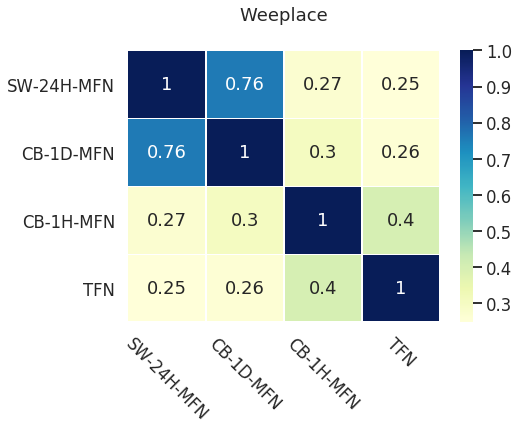

In [600]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(VIP_similarity , cmap="YlGnBu", ax=ax,
            linewidths=.5, annot=True)
# ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=-45)
ax.set_title('Weeplace', pad=30)
plt.show()

### Focus on each egos in these networks

In [601]:
# individual_similarity = {user: util.jaccard_pandas_similarity(VIP_merged[VIP_merged['userid'] == user]
#                                                               [['WT-MFN','SW-24H-MFN', 'CB-1D-MFN', 
#                                                                 'CB-1H-MFN', 'TFN']]) for user in share_users}
individual_similarity = {user: util.jaccard_pandas_similarity(VIP_merged[VIP_merged['userid'] == user]
                                                              [['SW-24H-MFN', 'CB-1D-MFN', 
                                                                'CB-1H-MFN', 'TFN']]) for user in share_users}

In [604]:
# df_individual_similarity = pd.concat([
#                            pd.DataFrame([['WT-MFN vs SW-24H-MFN', individual_similarity[user][0][1]] for user in share_users], 
#                                          columns=['Compare', 'Jaccard']),
#                            pd.DataFrame([['WT-MFN vs CB-1D-MFN', individual_similarity[user][0][2]] for user in share_users], 
#                                          columns=['Compare', 'Jaccard']),
#                            pd.DataFrame([['WT-MFN vs CB-1H-MFN', individual_similarity[user][0][3]] for user in share_users], 
#                                          columns=['Compare', 'Jaccard']),
#                            pd.DataFrame([['WT-MFN vs TFN', individual_similarity[user][0][4]] for user in share_users], 
#                                          columns=['Compare', 'Jaccard']),
#                            pd.DataFrame([['SW-24H-MFN vs CB-1D-MFN', individual_similarity[user][1][2]] for user in share_users], 
#                                          columns=['Compare', 'Jaccard']), 
#                            pd.DataFrame([['SW-24H-MFN vs CB-1H-MFN', individual_similarity[user][1][3]] for user in share_users],
#                                        columns=['Compare', 'Jaccard']),
#                            pd.DataFrame([['SW-24H-MFN vs TFN', individual_similarity[user][1][4]] for user in share_users],
#                                        columns=['Compare', 'Jaccard']),
#                            pd.DataFrame([['CB-1D-MFN vs CB-1H-MFN', individual_similarity[user][2][3]] for user in share_users],
#                                        columns=['Compare', 'Jaccard']),
#                            pd.DataFrame([['CB-1D-MFN vs TFN', individual_similarity[user][2][4]] for user in share_users],
#                                         columns=['Compare', 'Jaccard']),
#                            pd.DataFrame([['CB-1H-MFN vs TFN', individual_similarity[user][3][4]] for user in share_users], 
#                                        columns=['Compare', 'Jaccard'])
#                                         ]
#                                     )
df_individual_similarity = pd.concat([
                           pd.DataFrame([['SW-24H-MFN vs CB-1D-MFN', individual_similarity[user][0][1]] for user in share_users], 
                                         columns=['Compare', 'Jaccard']), 
                           pd.DataFrame([['SW-24H-MFN vs CB-1H-MFN', individual_similarity[user][0][2]] for user in share_users],
                                       columns=['Compare', 'Jaccard']),
                           pd.DataFrame([['SW-24H-MFN vs TFN', individual_similarity[user][0][3]] for user in share_users],
                                       columns=['Compare', 'Jaccard']),
                           pd.DataFrame([['CB-1D-MFN vs CB-1H-MFN', individual_similarity[user][1][2]] for user in share_users],
                                       columns=['Compare', 'Jaccard']),
                           pd.DataFrame([['CB-1D-MFN vs TFN', individual_similarity[user][1][3]] for user in share_users],
                                        columns=['Compare', 'Jaccard']),
                           pd.DataFrame([['CB-1H-MFN vs TFN', individual_similarity[user][2][3]] for user in share_users], 
                                       columns=['Compare', 'Jaccard'])
                                        ]
                                    )

In [605]:
df_individual_similarity.to_csv('final/wp-150/wp_VIP_similarity_user_CP.csv', index=False) 

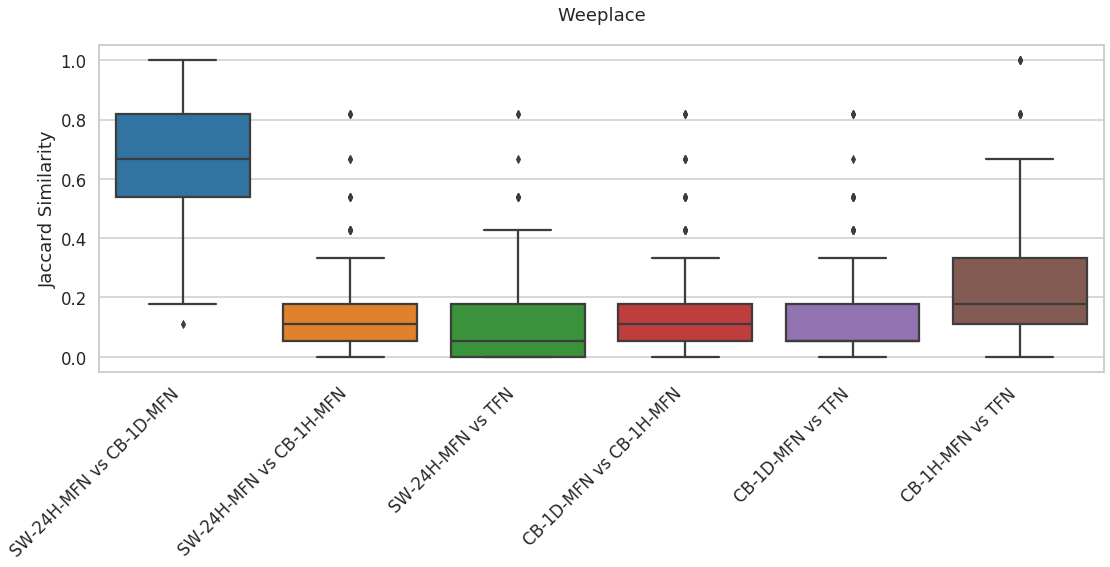

In [606]:
fig, ax = plt.subplots(figsize=(18, 6))
ax = sns.boxplot(data=df_individual_similarity , x='Compare', 
            y = 'Jaccard')
ax.set_title('Weeplace', pad = 25)
ax.set_xlabel('')
ax.set_ylabel('Jaccard Similarity')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

### Check Shared-Location rate (What does mean high ranking alter?)

In [607]:
VIP_Rank = VIP_network[['Included', 'userid', 'userid_y', 'category']]

In [608]:
pickle_in = open(placeid_path, "rb")
placeidT = pickle.load(pickle_in)
pickle_in.close()

In [609]:
VIP_rate = VIP_Rank.copy()
VIP_rate['USLR'] = VIP_Rank.apply(lambda row:util.shared_location_rate(row.userid, row.userid_y, placeidT)[0], axis=1)
VIP_rate['SLR'] = VIP_Rank.apply(lambda row:util.shared_location_rate(row.userid, row.userid_y, placeidT)[1], axis=1)

In [610]:
VIP_rate.to_csv('final/wp-150/wp_VIP_LR_CP.csv', index=False)

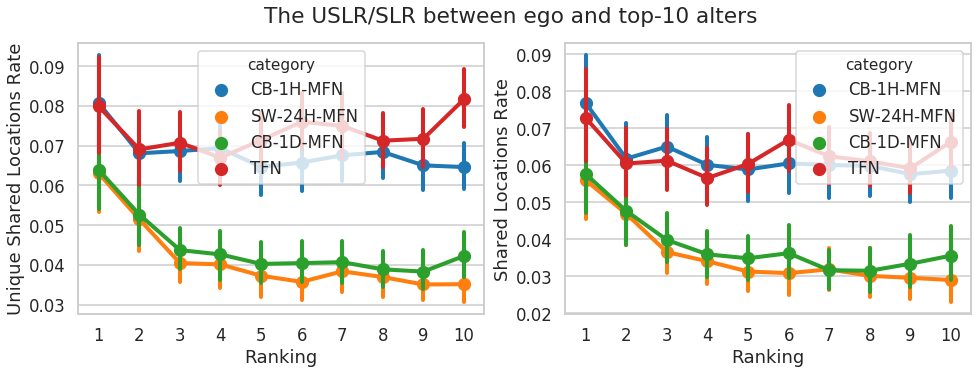

In [611]:
sns.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 5))
fig.suptitle("The USLR/SLR between ego and top-10 alters")

sns.pointplot(x="Included", y="USLR", 
              data=VIP_rate, 
              hue='category', ci=95, join='True', ax=ax1)
ax1.set_ylabel('Unique Shared Locations Rate')
ax1.set_xlabel('Ranking')

sns.pointplot(x="Included", y="SLR", 
              data=VIP_rate, 
              hue='category', ci=95, join='True', ax=ax2)
ax2.set_ylabel('Shared Locations Rate')
ax2.set_xlabel('Ranking')
plt.show()

# Global variables following ranking by Meetups and N_previous

In [4]:
placeid_path = "temp_data/wp-150/weeplace_placeidT_150.pickle"
MFN_H_path = "final/wp-150/wp-H-2-10-MeetupNp-MFN.csv"
MFN_D_path = "final/wp-150/wp-D-2-10-MeetupNp-MFN.csv"
MFN_24H_path = "final/wp-150/wp-24H-2-10-MeetupNp-MFN.csv"
MFN_TFN_path = "final/wp-150/wp-TFN-MeetupNp.csv"

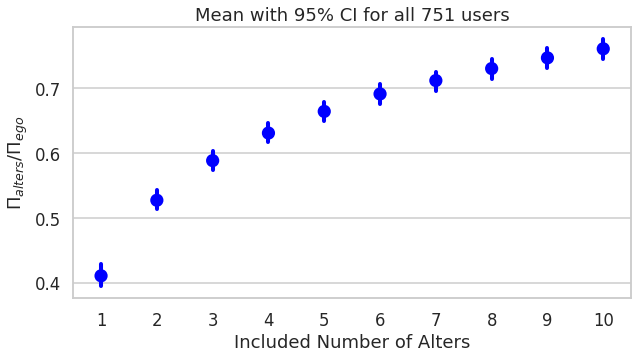

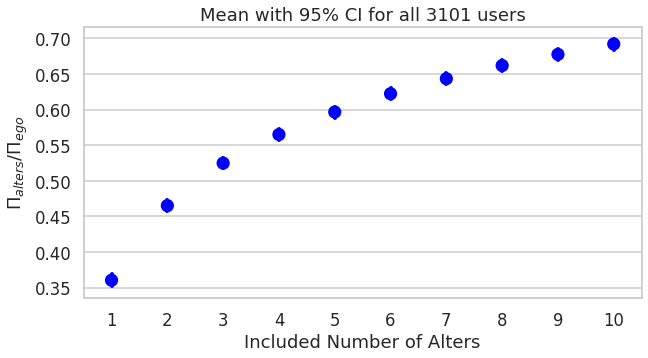

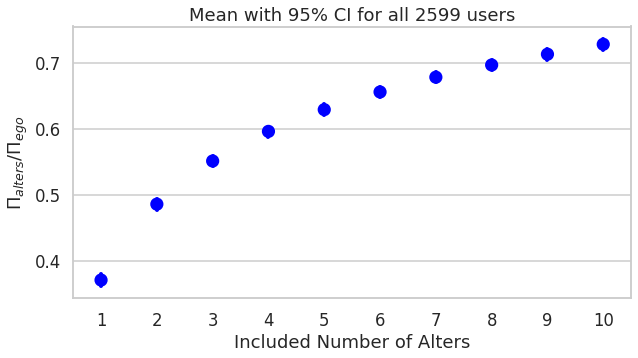

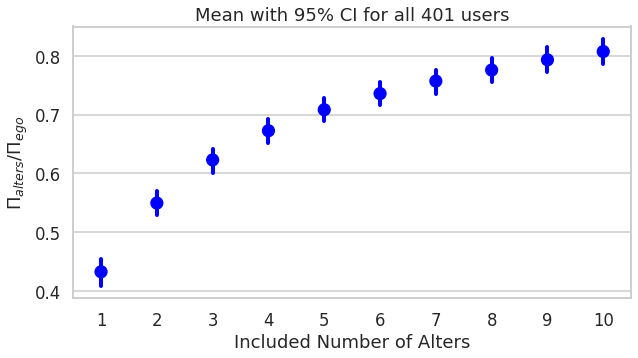

In [5]:
df_H_MFN = transform_df(MFN_H_path)
vs.cv_plot(df_H_MFN[df_H_MFN['n_meetupers_x'] >=10], threshold=10, 
           plot_type='errorbar', mode='talk', l=10, w=5)

df_24H_MFN = transform_df(MFN_24H_path)
vs.cv_plot(df_24H_MFN[df_24H_MFN['n_meetupers_x'] >=10], threshold=10, 
           plot_type='errorbar', mode='talk', l=10, w=5)

df_D_MFN = transform_df(MFN_D_path)
vs.cv_plot(df_D_MFN[df_D_MFN['n_meetupers_x'] >=10], threshold=10, 
           plot_type='errorbar', mode='talk', l=10, w=5)

df_TFN = transform_df(MFN_TFN_path)
vs.cv_plot(df_TFN[df_TFN['n_meetupers_x'] >=10], threshold=10, 
           plot_type='errorbar', mode='talk', l=10, w=5)

## All users

In [6]:
df_H_MFN['category'] = 'CB-1H-MFN'
df_D_MFN['category'] = 'CB-1D-MFN'
df_24H_MFN['category'] = 'SW-24H-MFN'
df_TFN['category'] = 'TFN'

all_networks = pd.concat([df_H_MFN, df_24H_MFN, df_D_MFN, df_TFN])
all_networks10 = all_networks[all_networks['n_meetupers_x'] >=10]
# all_networks10.to_csv('final/wp-150/wp_all_network_2_10_MeetupNp.csv', index=False)

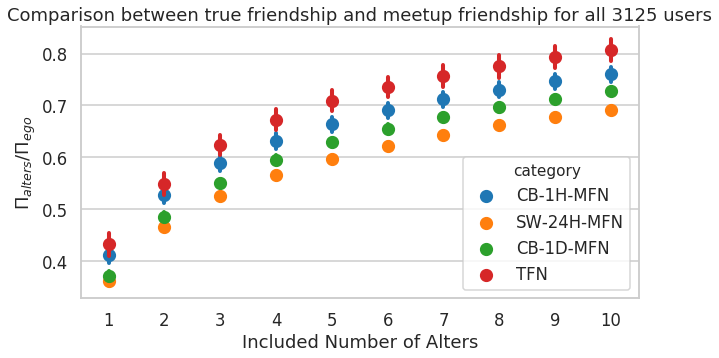

In [7]:
vs.cv_compare_plot(all_networks10, threshold=10, 
                   mode='talk', l=10, w=5)

## Only shared users

In [8]:
share_users_total = list(set(df_24H_MFN['userid'].tolist()) & 
                   set(df_H_MFN['userid'].tolist()) & 
                   set(df_D_MFN['userid'].tolist()) &
                   set(df_TFN['userid'].tolist()))
len(share_users_total)

704

In [9]:
share_users = list(set(df_24H_MFN[df_24H_MFN['n_meetupers_x'] >=10]['userid'].tolist()) & 
                   set(df_H_MFN[df_H_MFN['n_meetupers_x']>=10]['userid'].tolist()) & 
                   set(df_D_MFN[df_D_MFN['n_meetupers_x']>=10]['userid'].tolist()) &
                   set(df_TFN[df_TFN['n_meetupers_x']>=10]['userid'].tolist()) 
                  )
len(share_users)

285

In [10]:
share_network = pd.concat([df_H_MFN[df_H_MFN['userid'].isin(share_users)],
                           df_24H_MFN[df_24H_MFN['userid'].isin(share_users)], 
                           df_D_MFN[df_D_MFN['userid'].isin(share_users)],
                           df_TFN[df_TFN['userid'].isin(share_users)],
#                            df_all_MFN
                          ])


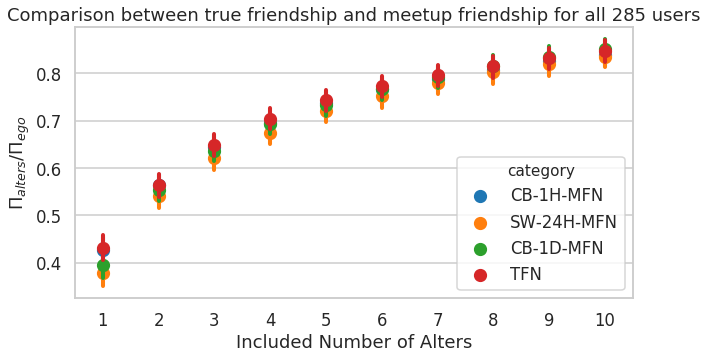

In [11]:
vs.cv_compare_plot(share_network, threshold=10, mode='talk', l=10, w=5)

In [12]:
# share_network.to_csv('final/wp-150/wp_shared_all_2_10_MeetupNp.csv', index=False)

## Check these friendship networks (Basic)

In [81]:
print(len(df_24H_MFN), len(df_D_MFN), len(df_H_MFN), len(df_TFN))
print(df_24H_MFN['userid'].nunique(), 
      df_D_MFN['userid'].nunique(), 
      df_H_MFN['userid'].nunique(), 
      df_TFN['userid'].nunique())

len(share_users)

265197 199550 25251 20617
3101 2599 751 5492


285

In [83]:
VIP_network = share_network[share_network['Included'] <=10]
# VIP_network.to_csv('final/wp-150/wp_VIP_MeetupNp.csv', index=False)

In [85]:
VIP_network_24H_MFN = VIP_network[VIP_network['category'] == 'SW-24H-MFN'][['Included','userid', 'userid_y']]
VIP_network_D_MFN = VIP_network[VIP_network['category'] == 'CB-1D-MFN'][['Included', 'userid', 'userid_y']]
VIP_network_H_MFN = VIP_network[VIP_network['category'] == 'CB-1H-MFN'][['Included', 'userid', 'userid_y']]
VIP_network_TFN = VIP_network[VIP_network['category'] == 'TFN'][['Included', 'userid', 'userid_y']]

VIP_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Included','userid'],
                                                how='left'), [VIP_network_24H_MFN, 
                                                              VIP_network_D_MFN,
                                                              VIP_network_H_MFN,
                                                              VIP_network_TFN])

VIP_merged.columns = ['Included', 'userid', 'SW-24H-MFN', 'CB-1D-MFN', 'CB-1H-MFN', 'TFN']

### Gobal Jaccard similarity for all alters in these networks

In [86]:
VIP_similarity = util.jaccard_pandas_similarity(VIP_merged[VIP_merged.columns[-4:]])
VIP_similarity = pd.DataFrame(VIP_similarity, columns=['SW-24H-MFN', 'CB-1D-MFN', 'CB-1H-MFN', 'TFN'])
VIP_similarity.index = ['SW-24H-MFN', 'CB-1D-MFN', 'CB-1H-MFN', 'TFN']

# pickle_out = open("final/wp-150/wp_VIP_similarity_MeetupNp.pickle", "wb")
# pickle.dump(VIP_similarity, pickle_out)
# pickle_out.close()

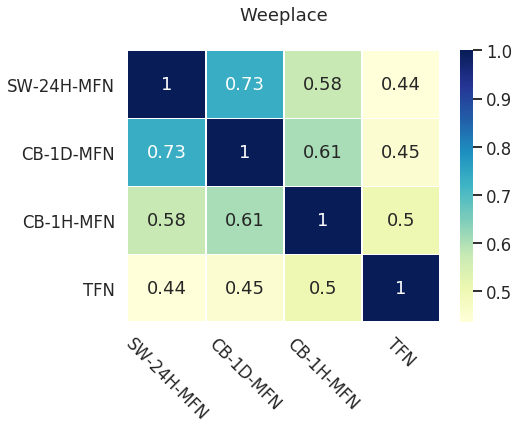

In [87]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(VIP_similarity , cmap="YlGnBu", ax=ax,
            linewidths=.5, annot=True)
# ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=-45)
ax.set_title('Weeplace', pad=30)
plt.show()

### Local similarity

In [88]:
individual_similarity = {user: util.jaccard_pandas_similarity(VIP_merged[VIP_merged['userid'] == user]
                                                              [['SW-24H-MFN', 
                                                                'CB-1D-MFN', 
                                                                'CB-1H-MFN', 
                                                                'TFN']]) for user in share_users}

df_individual_similarity = pd.concat([
                           pd.DataFrame([['SW-24H-MFN vs CB-1D-MFN', individual_similarity[user][0][1]] for user in share_users], 
                                         columns=['Compare', 'Jaccard']), 
                           pd.DataFrame([['SW-24H-MFN vs CB-1H-MFN', individual_similarity[user][0][2]] for user in share_users],
                                       columns=['Compare', 'Jaccard']),
                           pd.DataFrame([['SW-24H-MFN vs TFN', individual_similarity[user][0][3]] for user in share_users],
                                       columns=['Compare', 'Jaccard']),
                           pd.DataFrame([['CB-1D-MFN vs CB-1H-MFN', individual_similarity[user][1][2]] for user in share_users],
                                       columns=['Compare', 'Jaccard']),
                           pd.DataFrame([['CB-1D-MFN vs TFN', individual_similarity[user][1][3]] for user in share_users],
                                        columns=['Compare', 'Jaccard']),
                           pd.DataFrame([['CB-1H-MFN vs TFN', individual_similarity[user][2][3]] for user in share_users], 
                                       columns=['Compare', 'Jaccard'])
                                        ]
                                    )

# df_individual_similarity.to_csv('final/wp-150/wp_VIP_similarity_user_MeetupNp.csv', index=False) 

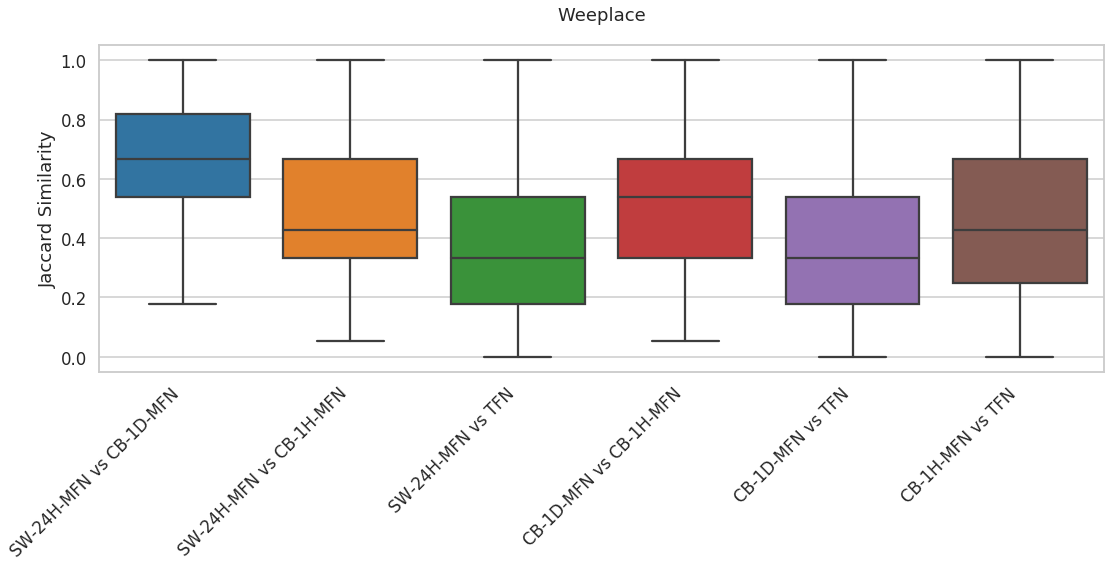

In [89]:
fig, ax = plt.subplots(figsize=(18, 6))
ax = sns.boxplot(data=df_individual_similarity , x='Compare', 
            y = 'Jaccard')
ax.set_title('Weeplace', pad = 25)
ax.set_xlabel('')
ax.set_ylabel('Jaccard Similarity')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

### Check Shared-Location rate (What does mean high ranking alter?)

In [90]:
pickle_in = open(placeid_path, "rb")
placeidT = pickle.load(pickle_in)
pickle_in.close()

VIP_Rank = VIP_network[['Included', 'userid', 'userid_y', 'category']]
VIP_rate = VIP_Rank.copy()
VIP_rate['USLR'] = VIP_Rank.apply(lambda row:util.shared_location_rate(row.userid, row.userid_y, placeidT)[0], axis=1)
VIP_rate['SLR'] = VIP_Rank.apply(lambda row:util.shared_location_rate(row.userid, row.userid_y, placeidT)[1], axis=1)

VIP_rate.to_csv('final/wp-150/wp_VIP_LR_MeetupNp.csv', index=False)

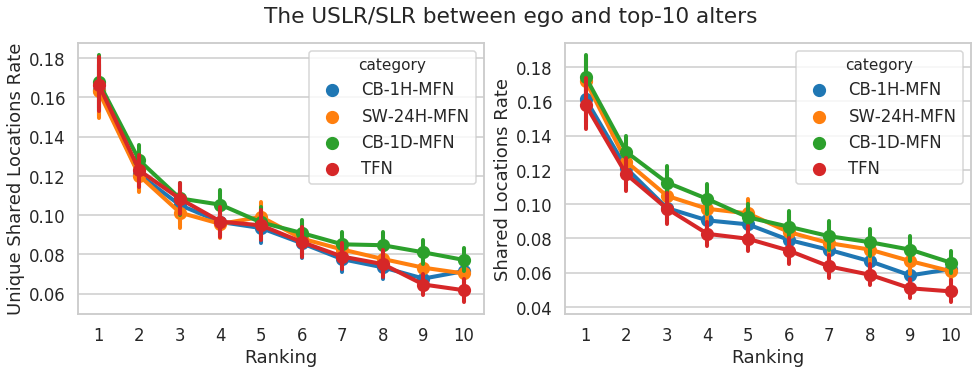

In [91]:
sns.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 5))
fig.suptitle("The USLR/SLR between ego and top-10 alters")

sns.pointplot(x="Included", y="USLR", 
              data=VIP_rate, 
              hue='category', ci=95, join='True', ax=ax1)
ax1.set_ylabel('Unique Shared Locations Rate')
ax1.set_xlabel('Ranking')

sns.pointplot(x="Included", y="SLR", 
              data=VIP_rate, 
              hue='category', ci=95, join='True', ax=ax2)
ax2.set_ylabel('Shared Locations Rate')
ax2.set_xlabel('Ranking')
plt.show()